## Daniel Barella
11/5/25

# 🚀 Day 35 — Gradient Boosting (XGBoost & LightGBM)

**Objective:** Understand and apply **gradient boosting algorithms** to improve model accuracy using sequential learning.

---

## 🧠 Concept Breakdown

### 🌄 What Is Gradient Boosting?

Gradient Boosting is an **ensemble method** that builds models **sequentially**, where each new model fixes the errors of the previous one.

**Key idea:**
- Start with a weak model (e.g., a small decision tree)
- Fit a new model to the residuals (errors)
- Add it to the ensemble with a learning rate
- Repeat until the model stops improving

### 🧩 Why It Works
- Combines the **bias reduction** of boosting with the **variance reduction** of ensembling.
- Extremely effective on **tabular data**.
- Sensitive to hyperparameters → needs careful tuning.

---

## 🧪 Practice: Gradient Boosting in Action

### 1️⃣ Import Libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## 2️⃣ Load and Prepare Data (Titanic again for consistency)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3️⃣ Basic Gradient Boosting Model

In [3]:
gb = GradientBoostingClassifier(
    n_estimators=150, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## 4️⃣ Feature Importance

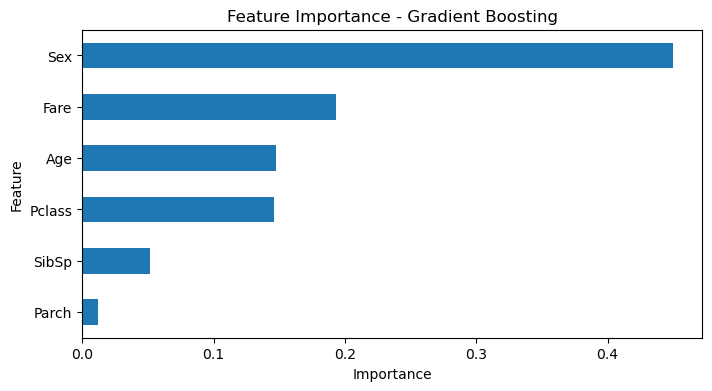

In [4]:
importances = pd.Series(gb.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,4))
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## ⚡ XGBoost
1️⃣ Install and Import

In [5]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [6]:
from xgboost import XGBClassifier


/Users/danielbarella/miniconda3/envs/dojo-env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")


## 2️⃣ Train Model

In [7]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



/Users/danielbarella/miniconda3/envs/dojo-env/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## ⚡ LightGBM
1️⃣ Install and Import

In [9]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [10]:
import lightgbm as lgb


## 2️⃣ Train Model

In [11]:
lgbm = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

lgbm.fit(X_train, y_train)
y_pred_lgb = lgbm.predict(X_test)

print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgb))


LightGBM Results:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## ⚔️ Model Comparison

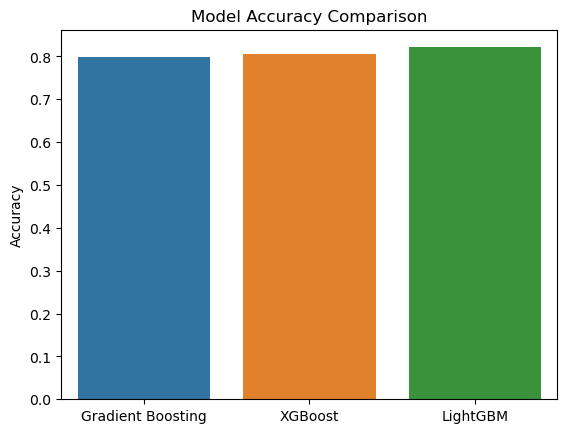

In [12]:
models = ['Gradient Boosting', 'XGBoost', 'LightGBM']
accuracies = [
    gb.score(X_test, y_test),
    xgb.score(X_test, y_test),
    lgbm.score(X_test, y_test)
]

sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


## 🎯 Mini Project — Credit Default Risk Prediction

Goal: Predict which customers are likely to default on a loan using boosting models.

In [13]:
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=6,
    n_redundant=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("Credit Default Prediction (XGBoost):")
print(classification_report(y_test, y_pred))


Credit Default Prediction (XGBoost):
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       136
           1       0.84      0.94      0.88       114

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



/Users/danielbarella/miniconda3/envs/dojo-env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## 💡 Insights

XGBoost often performs best with minimal tuning.

LightGBM is faster on large datasets.

Tuning parameters like learning_rate, max_depth, and n_estimators is crucial.

Boosting shines when other models underfit.